In [1]:
import pandas as pd
import numpy as np
from glob import glob
from IPython.display import HTML, display
from data_mani.visu import *
from prediction.functions import *

In [2]:
PREDICTION_MODEL = ['logit', 'ridge', 'lasso', 'enet', 'random_forest', 'lgb', 'nn3']
FS_METHODS = ['all', 'sfi', 'mdi', 'mda', 'granger', 'huang', 'IAMB', 'MMMB']
TICKER_NAMES = ['SPX Index', 'CCMP Index', 'RTY Index', 'SPX Basic Materials', 'SPX Communications',
                'SPX Consumer Cyclical', 'SPX Consumer Non cyclical', 'SPX Energy', 'SPX Financial',
                'SPX Industrial', 'SPX Technology', 'SPX Utilities']
TITLE = 'OOS Cummulative Returns for each Feature Selection Method given a Prediction Model'
BENCHMARK_NAME = 'return_direction'
METRIC_NAME = 'auc'

# Main reference

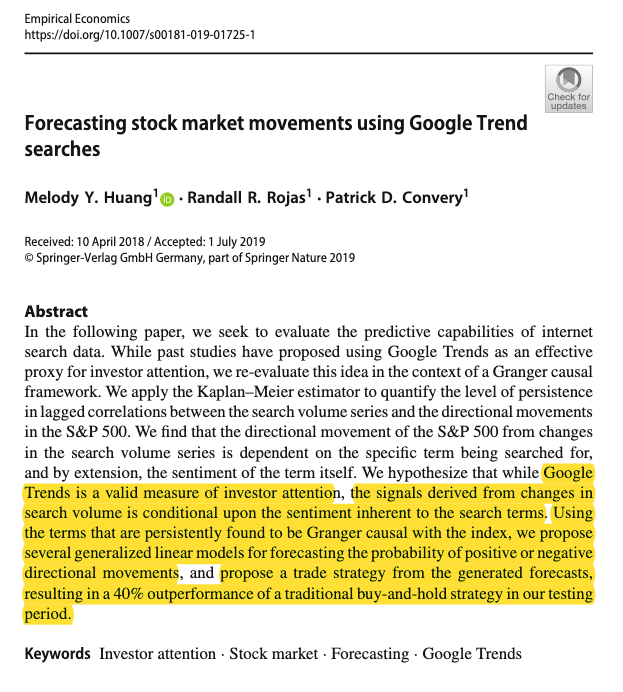

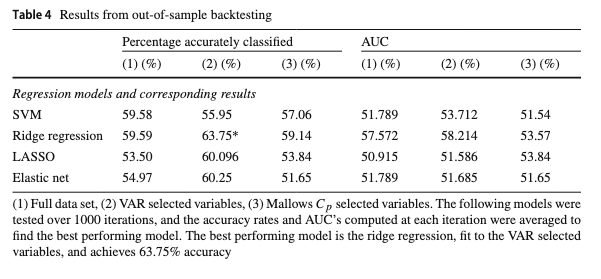

# Our models


## Feature Selection

> 1. All

> 2. Mean decrease impurity (random forest based) - MDI

> 3. Mean decrease accuracy (oos loss of performance; class based) - MDA

> 4. Single feature importance (oos individual feature; reg based) - SFI

> 5. Grenger causality - GRANGER

> 6. Granger causality + Logit - HUANG

> 7. Incremental association Markov boundary - IAMB

> 8. Max-Min Markov boundary - MMMB


## Prediction Models

> 1. Logit

> 2. Ridge regression

> 3. Lasso regression

> 4. Elastic net regression

> 5. Random Forest

> 6. Gradient Boosting

> 7. LSTM neural network (three layer)

## Prediction Setup

> 0. Sample from '2005-01-03' to '2020-12-31'

> 1. Feature selection: '2005-01-03' to '2012-07-03'

> 2. Forecasting: '2012-07-04' to '2020-12-31'

>> a. Random Search

>> b. Predict next year

>> c. Increase sample

# Aggregate prediction results

In [3]:
benchmarks = glob('data/indices/*.csv')
bench_list = []
for b in benchmarks:
    ticker = b.replace('data/indices/', '').replace('.csv', '')
    bench_ret_df = pd.read_csv(b)[3:]
    bench_ret_df.columns = ['date', 'return']
    bench_ret_df = bench_ret_df.melt('date')
    bench_ret_df['model'] = bench_ret_df['ticker'] = ticker
    bench_ret_df['fs'] = 'raw'

    bench_list.append(bench_ret_df)
benchmark_df = pd.concat(bench_list, axis=0)
benchmark_df['value'] = benchmark_df['value'].astype(float)

In [4]:
oos_melt_predictions_df, oos_melt_benchmark_df, oos_melt_auc_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                               fs_models=FS_METHODS,
                                                                                               evaluation_start_date='2012-07-03',
                                                                                               evaluation_end_date='2020-12-31',
                                                                                               ticker_names=TICKER_NAMES,
                                                                                               metric_name=METRIC_NAME,
                                                                                               tag='oos',
                                                                                               benchmark_name=BENCHMARK_NAME)

/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [5]:
is_melt_predictions_df, is_melt_benchmark_df, is_melt_auc_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                            fs_models=FS_METHODS,
                                                                                            evaluation_start_date='2005-01-03',
                                                                                            evaluation_end_date='2012-07-03',
                                                                                            ticker_names=TICKER_NAMES,
                                                                                            metric_name=METRIC_NAME,
                                                                                            tag='is',
                                                                                            benchmark_name=BENCHMARK_NAME)

/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [6]:
oos_pred_ret_df, oos_pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=oos_melt_predictions_df,
                                                                         class_threshold=0.5,
                                                                         target_asset_returns=benchmark_df)

is_pred_ret_df, is_pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=is_melt_predictions_df,
                                                                       class_threshold=0.5,
                                                                       target_asset_returns=benchmark_df)

## AUC

In [7]:
oos_auc_tb, oos_agg_fs_auc_tb, oos_agg_fore_auc_tb = plot_df_to_table(df=oos_melt_auc_df,
                                                                      index=['ticker', 'fs'],
                                                                      columns=['model'],
                                                                      values=['oosauc'],
                                                                      apply_factor_to_table=100)

is_auc_tb, is_agg_fs_auc_tb, is_agg_fore_auc_tb = plot_df_to_table(df=is_melt_auc_df,
                                                                   index=['ticker', 'fs'],
                                                                   columns=['model'],
                                                                   values=['isauc'],
                                                                   apply_factor_to_table=100)

In [8]:
oos_auc_tb.reset_index().melt(['ticker', 'fs']).pivot_table(index=['fs'], columns=['model'], values=['value'], aggfunc='median')

value                                                      
model      enet   lasso     lgb   logit     nn3 random_forest   ridge
fs                                                                   
IAMB     50.465  50.450  49.605  50.475  50.385        50.060  50.475
MMMB     49.180  49.180  49.595  49.190  49.620        49.140  49.185
all      50.425  50.135  50.130  50.020  49.540        49.460  49.950
granger  50.600  50.615  49.700  50.550  49.755        49.505  50.545
huang    50.090  50.070  50.075  50.075  49.570        49.560  50.070
mda      49.800  50.345  49.565  50.430  49.835        50.135  50.155
mdi      49.605  50.295  49.140  49.735  49.815        49.250  50.115
sfi      50.405  50.305  49.555  50.810  50.000        48.510  49.965

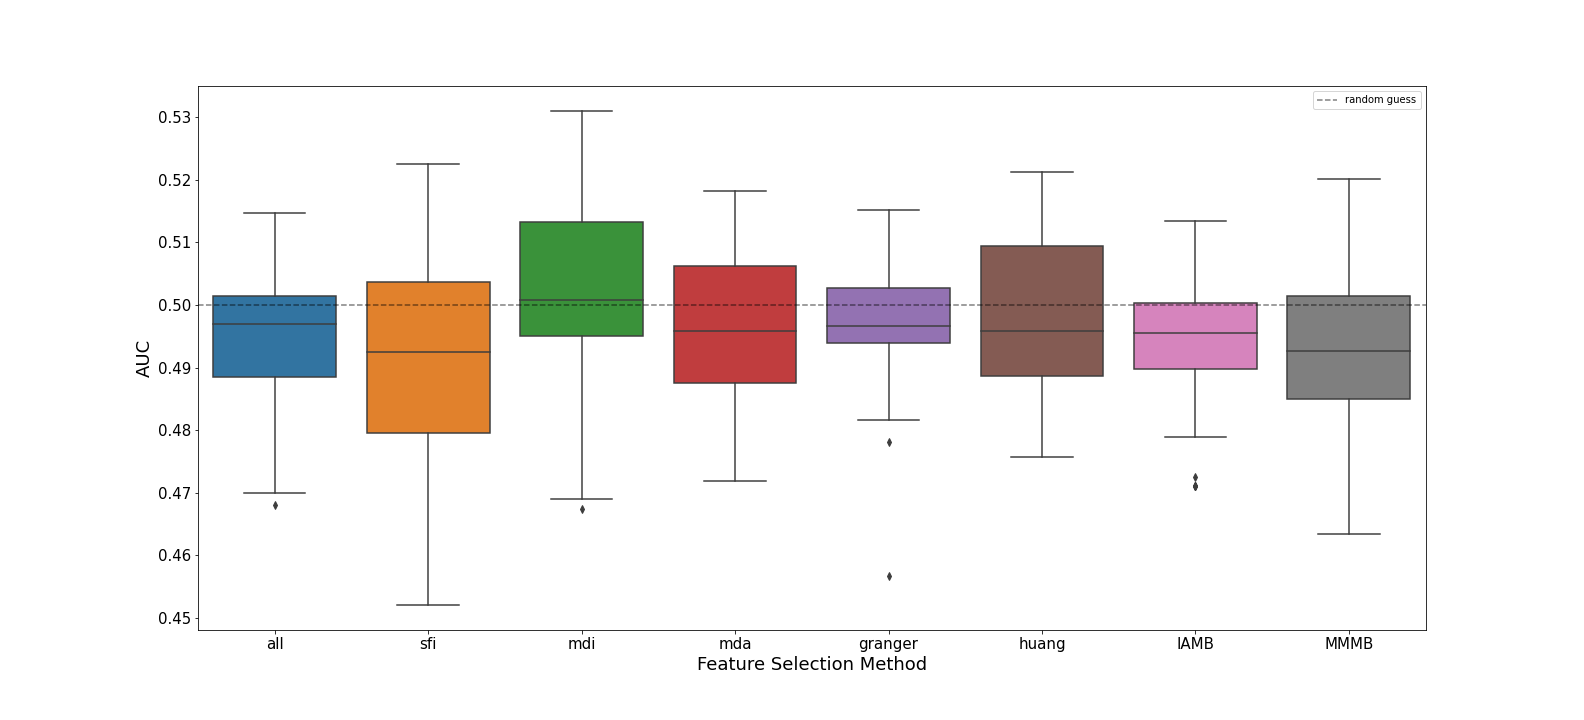

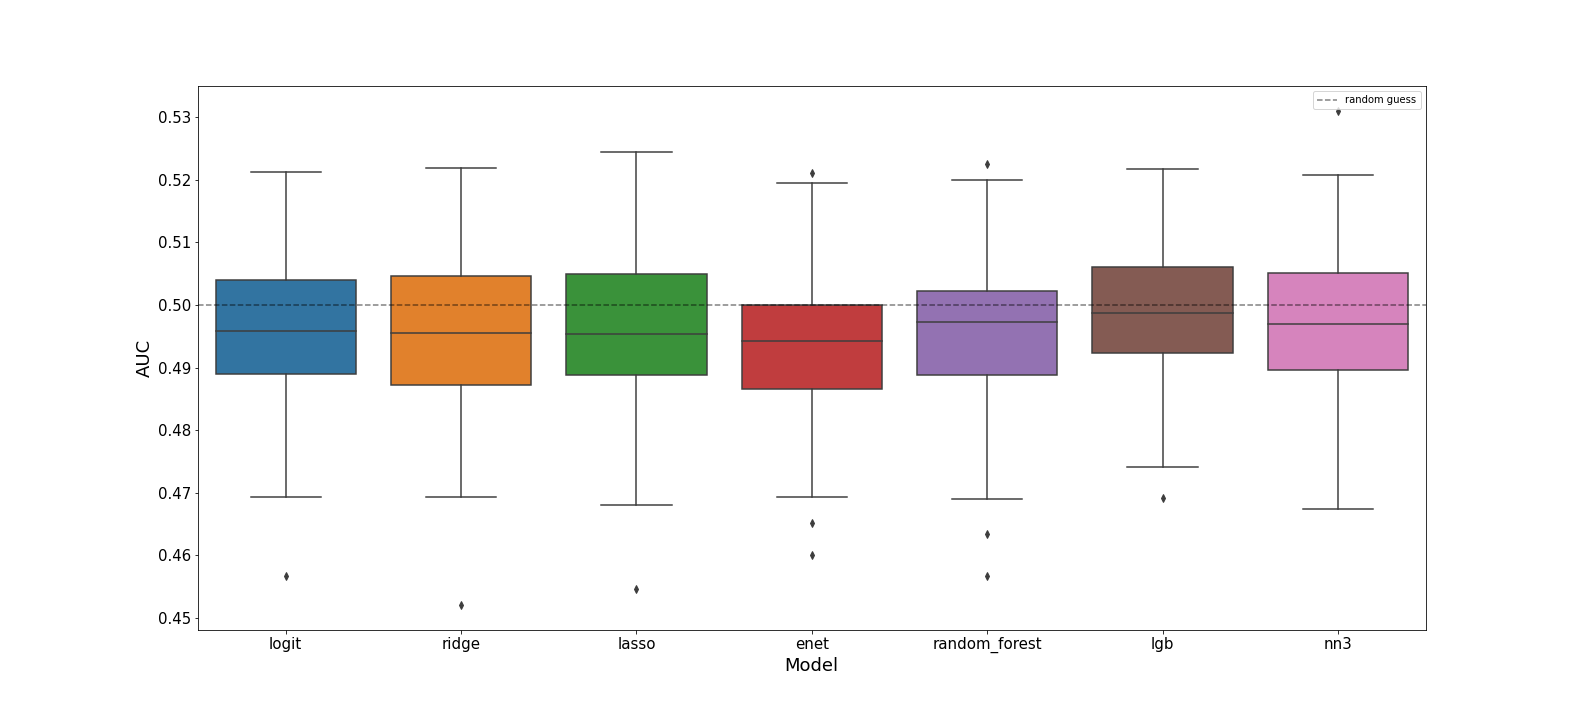

In [9]:
spx_oos_auc_tb = oos_auc_tb.reset_index()
spx_oos_auc_tb = spx_oos_auc_tb.loc[spx_oos_auc_tb['ticker']=='SPX Index']
spx_oos_auc_tb.set_index(['ticker', 'fs'], inplace=True)
spx_oos_auc_tb

model               enet  lasso    lgb  logit    nn3  random_forest  ridge
ticker    fs                                                              
SPX Index IAMB     50.86  50.84  51.02  50.85  51.75          51.26  50.85
          MMMB     49.73  49.74  51.43  49.74  50.13          50.92  49.73
          all      50.38  50.14  48.31  50.46  46.87          49.66  50.11
          granger  50.39  50.67  48.59  50.01  49.98          49.11  50.02
          huang    51.82  51.79  50.05  51.78  49.77          50.37  51.78
          mda      50.62  50.81  49.06  50.79  47.91          49.30  50.89
          mdi      50.25  51.12  49.22  50.52  49.58          49.09  50.60
          sfi      48.98  49.44  48.12  48.86  50.08          48.16  48.48

In [10]:
spx_oos_auc_tb.median(axis=1).sort_values(ascending=False)

ticker     fs     
SPX Index  huang      51.78
           IAMB       50.86
           mda        50.62
           mdi        50.25
           all        50.11
           granger    50.01
           MMMB       49.74
           sfi        48.86
dtype: float64

In [11]:
spx_oos_auc_tb.median(axis=0).sort_values(ascending=False)

model
lasso            50.740
logit            50.490
enet             50.385
ridge            50.355
nn3              49.875
random_forest    49.480
lgb              49.140
dtype: float64

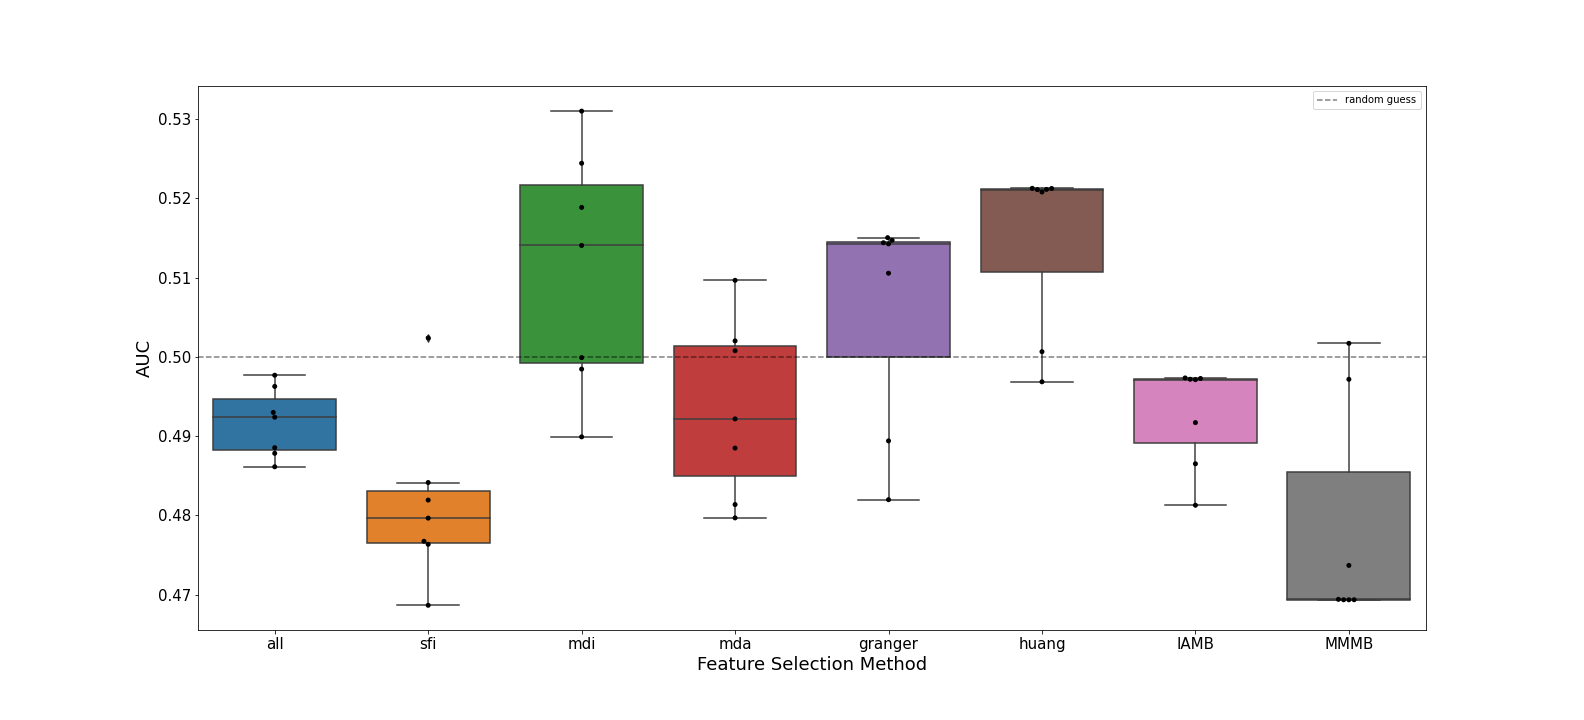

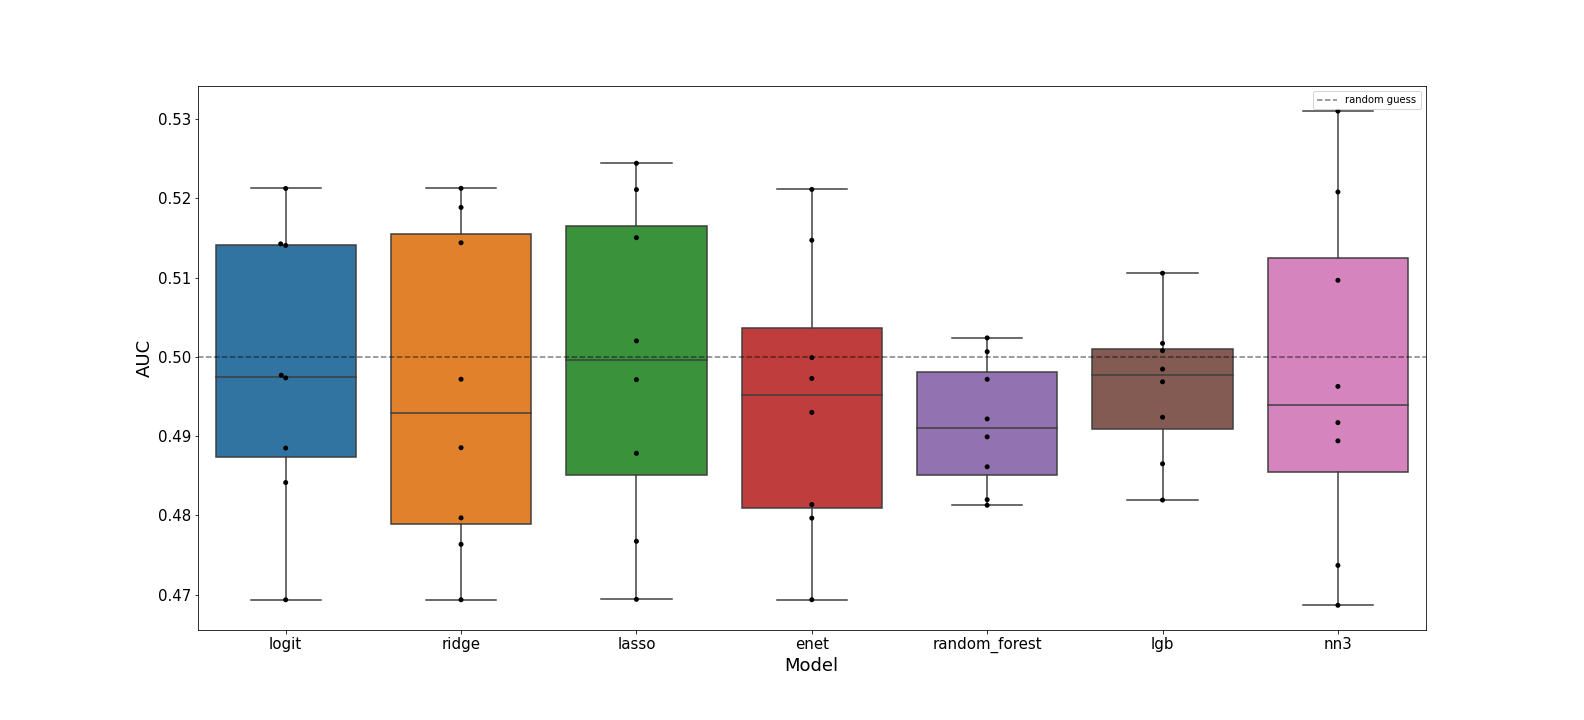

# Cummulative returns

In [12]:
ticker = 'SPX Energy'
summary_oos_pred_ret_df = oos_pred_ret_df.loc[oos_pred_ret_df['ticker']==ticker]
summary_benchmark_df = benchmark_df.loc[benchmark_df['ticker']==ticker]

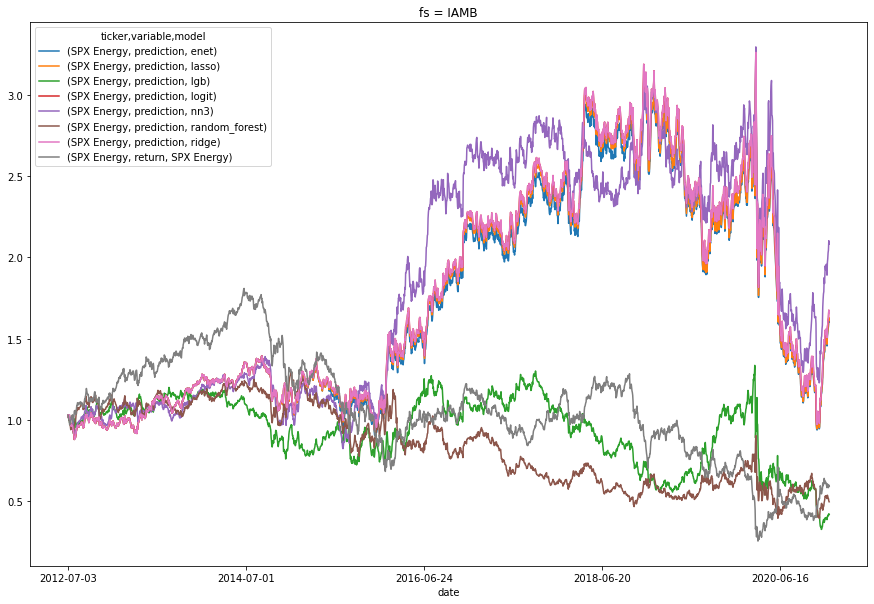

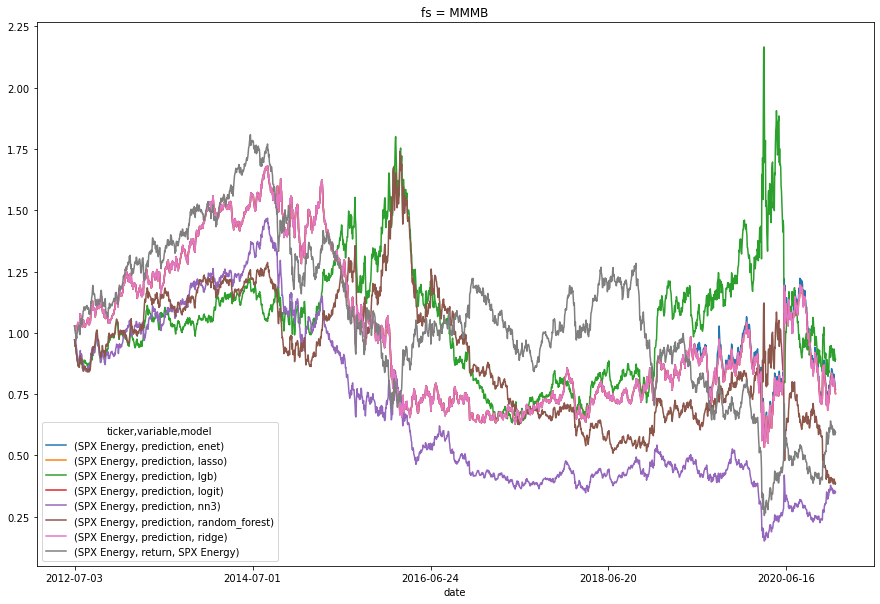

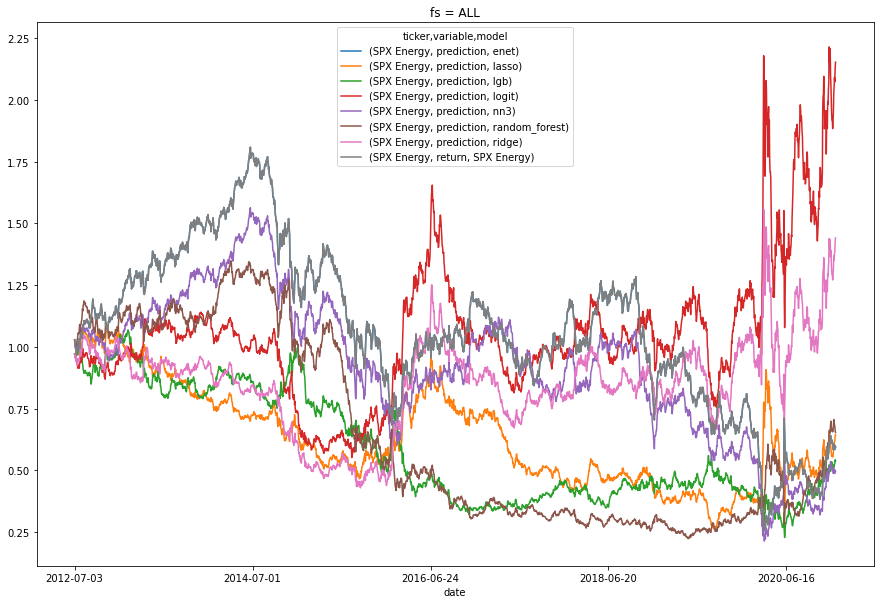

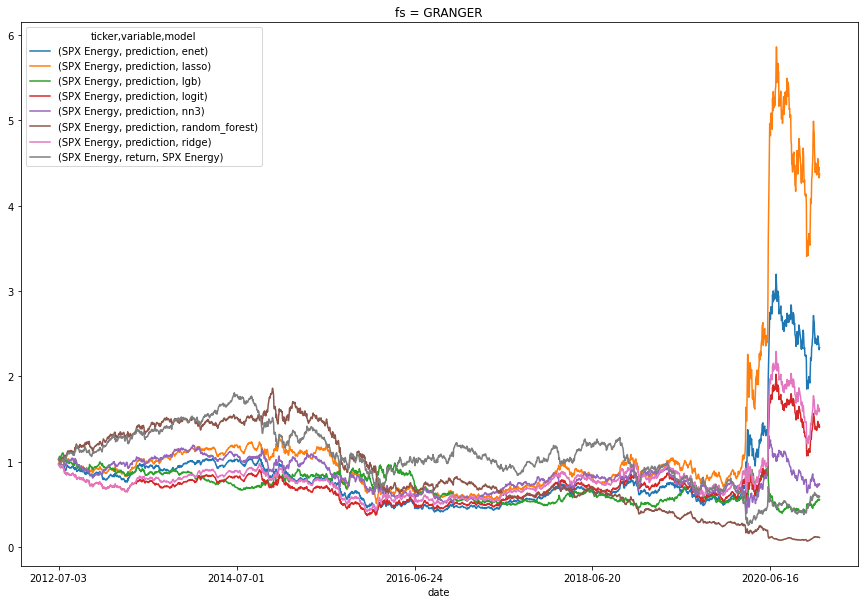

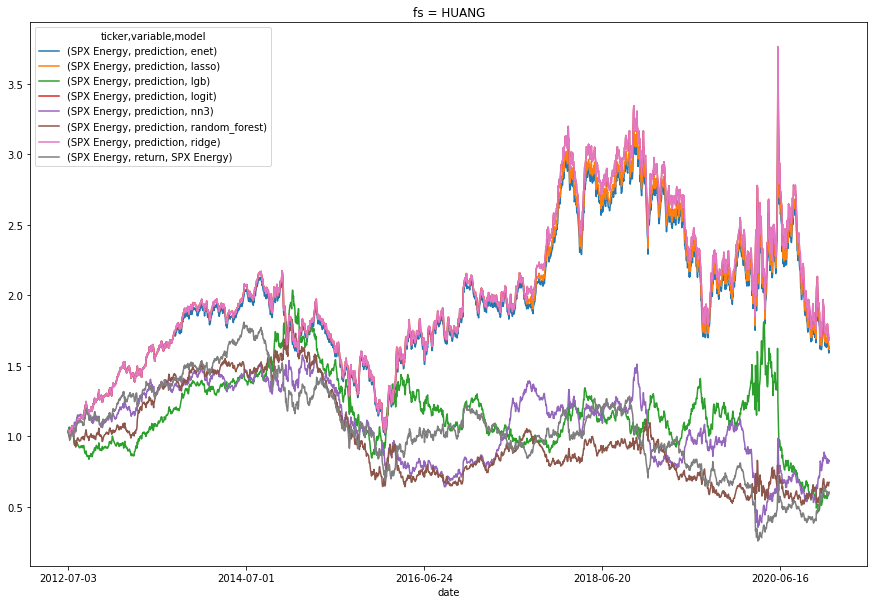

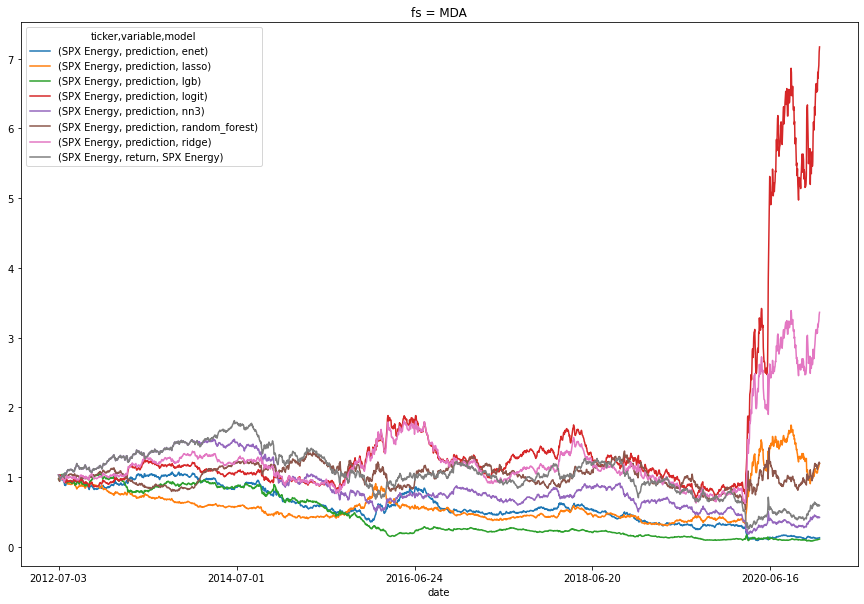

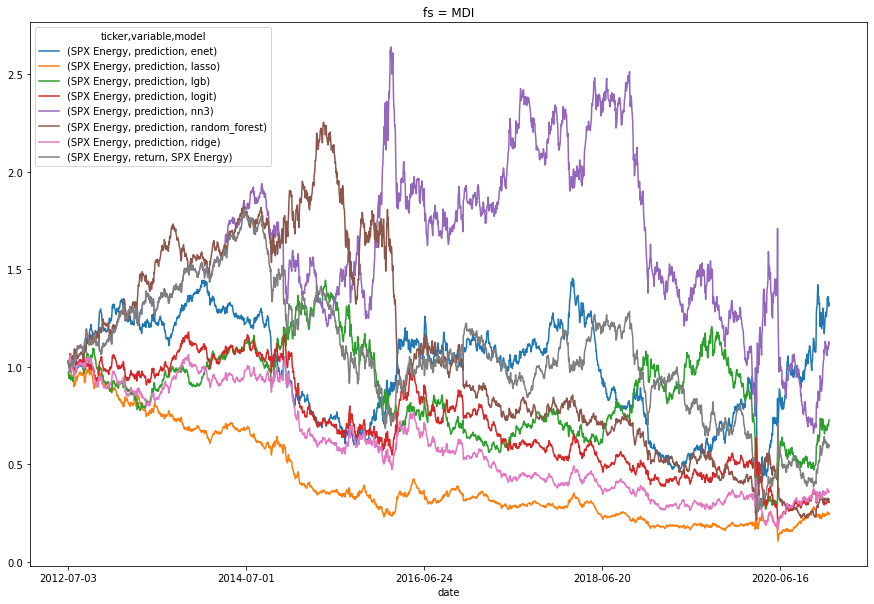

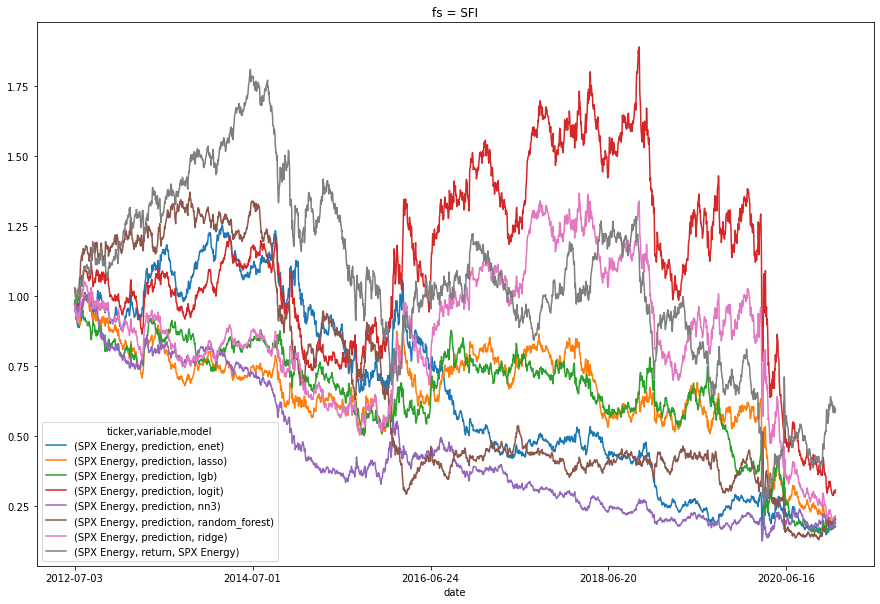

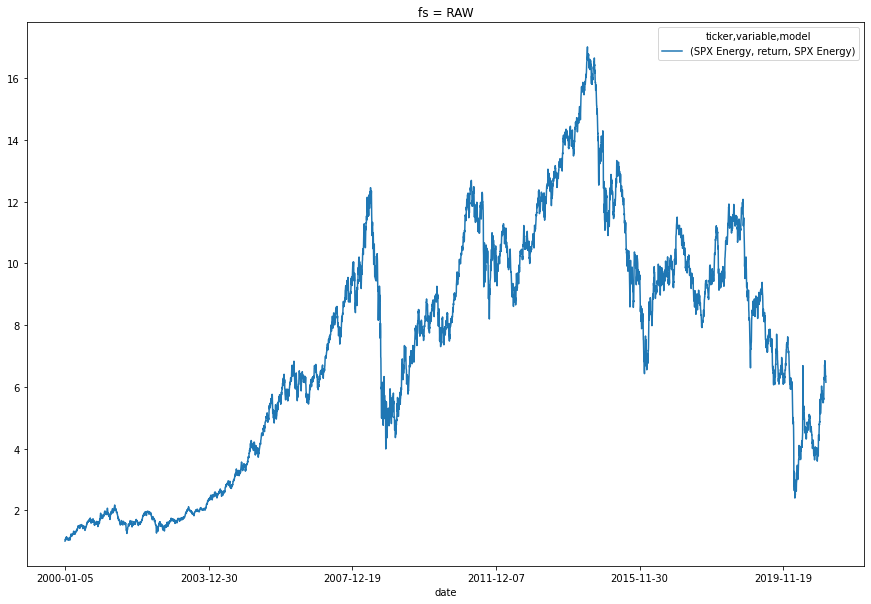

In [13]:
cum_ret_df2 = plot_cum_ret(pred_ret_df=summary_oos_pred_ret_df,
                           benchmark_df=summary_benchmark_df,
                           level_to_subset='fs',
                           show=True)

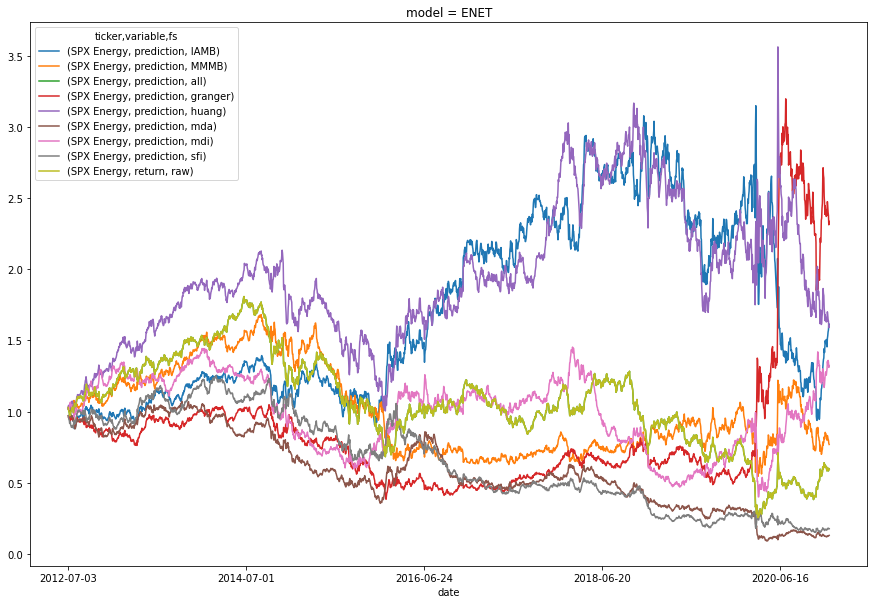

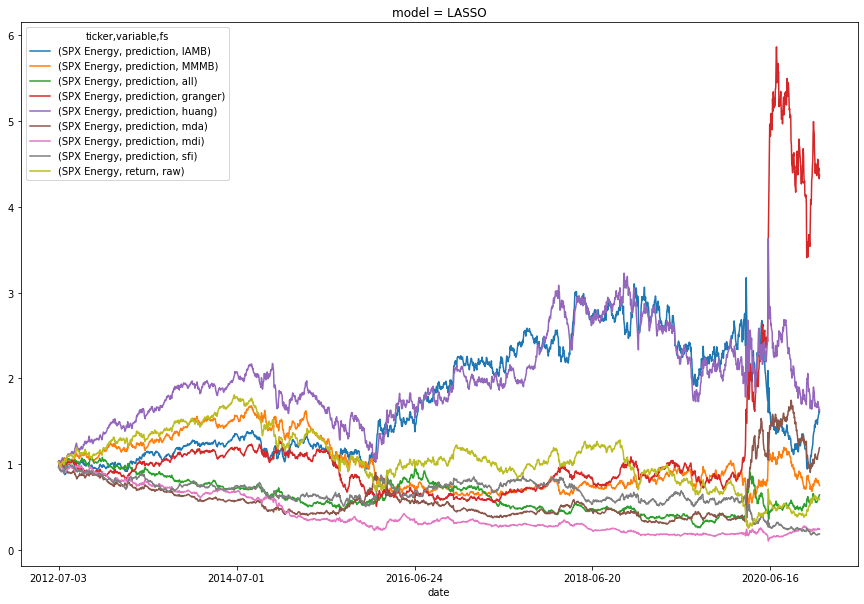

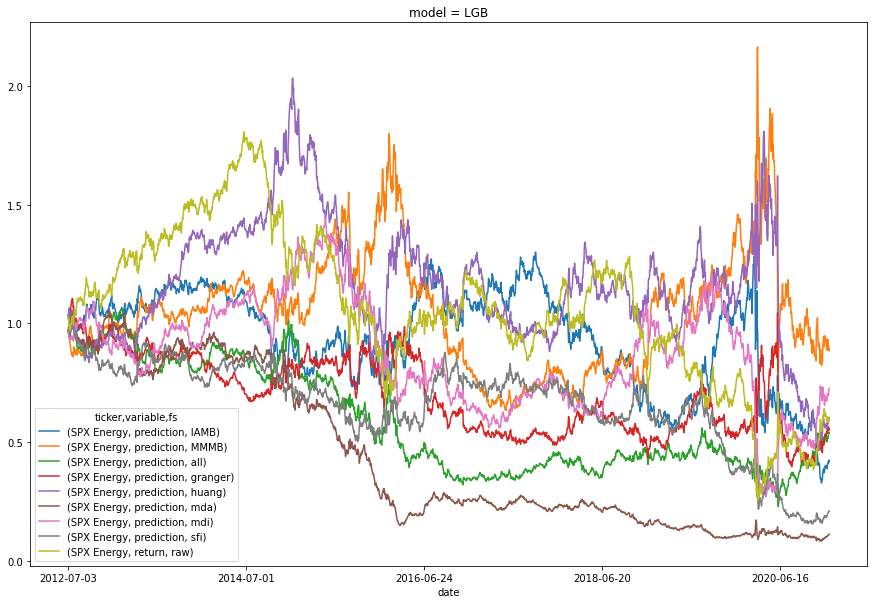

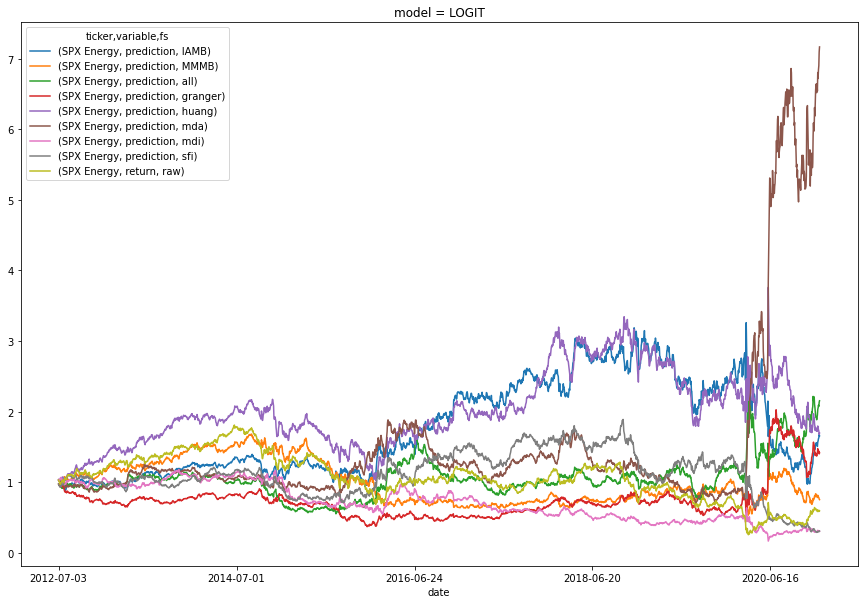

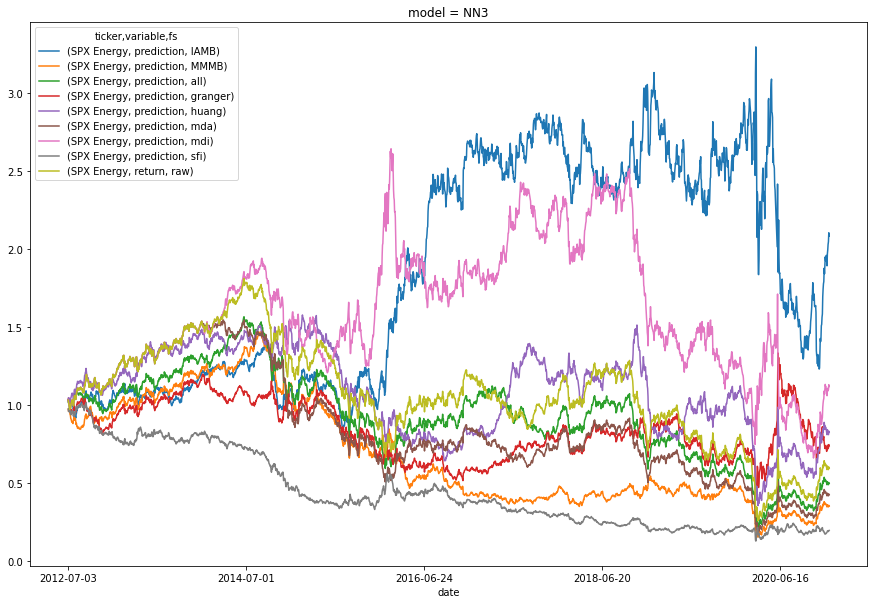

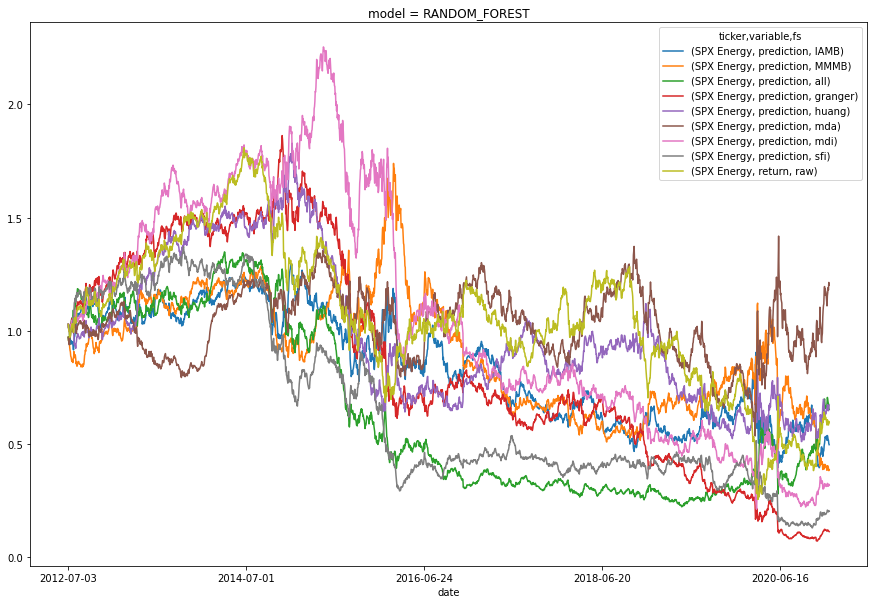

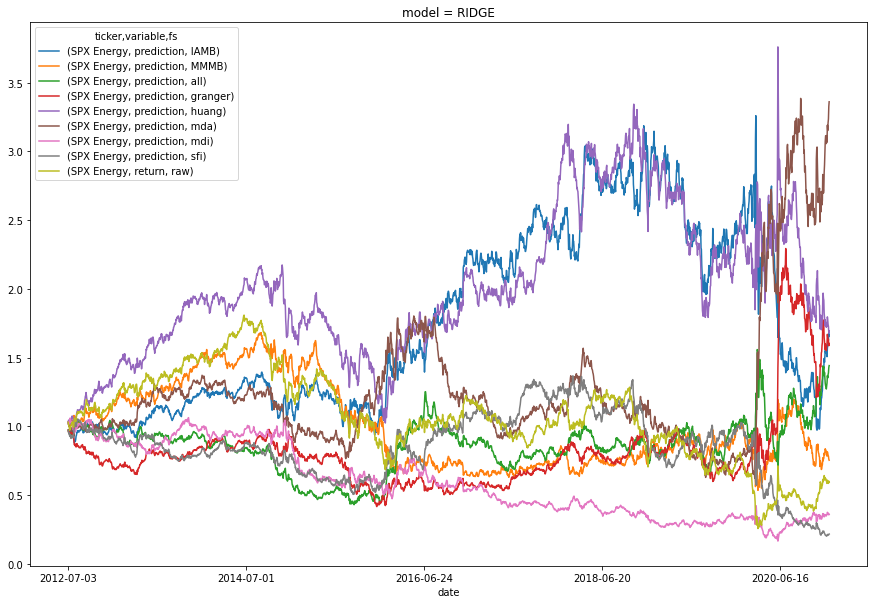

In [14]:
cum_ret_df2 = plot_cum_ret(pred_ret_df=summary_oos_pred_ret_df,
                           benchmark_df=summary_benchmark_df,
                           level_to_subset='model',
                           show=True)

# Sharpe ratio

In [15]:
ret_all_df = pd.concat([oos_pred_ret_df, benchmark_df], axis=0)
pivot_ret_all_df = ret_all_df.pivot_table(index=['date'], columns=['variable', 'ticker', 'model', 'fs'], values=['value'])

In [16]:
sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df.dropna(),
                                                  level_to_subset='fs',
                                                  rf=.0)

In [17]:
sr_rank_df.reset_index().groupby(['fs'], as_index=False).median().sort_values('sharpe ratio', ascending=False)

fs  sharpe ratio
4    huang      0.672774
1     MMMB      0.625166
7      raw      0.603661
3  granger      0.449096
0     IAMB      0.304138
2      all      0.263446
5      mda      0.248064
8      sfi      0.211546
6      mdi      0.204393

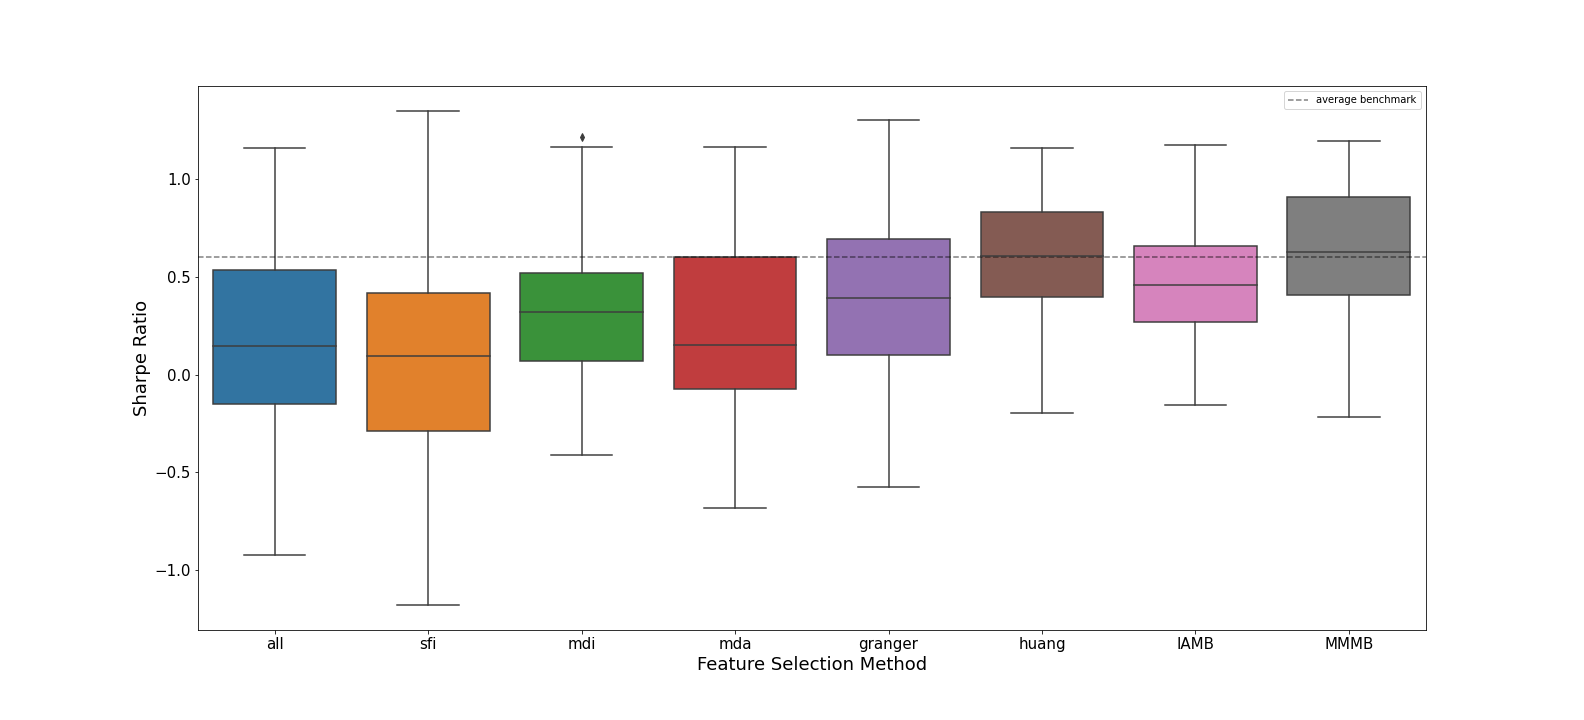

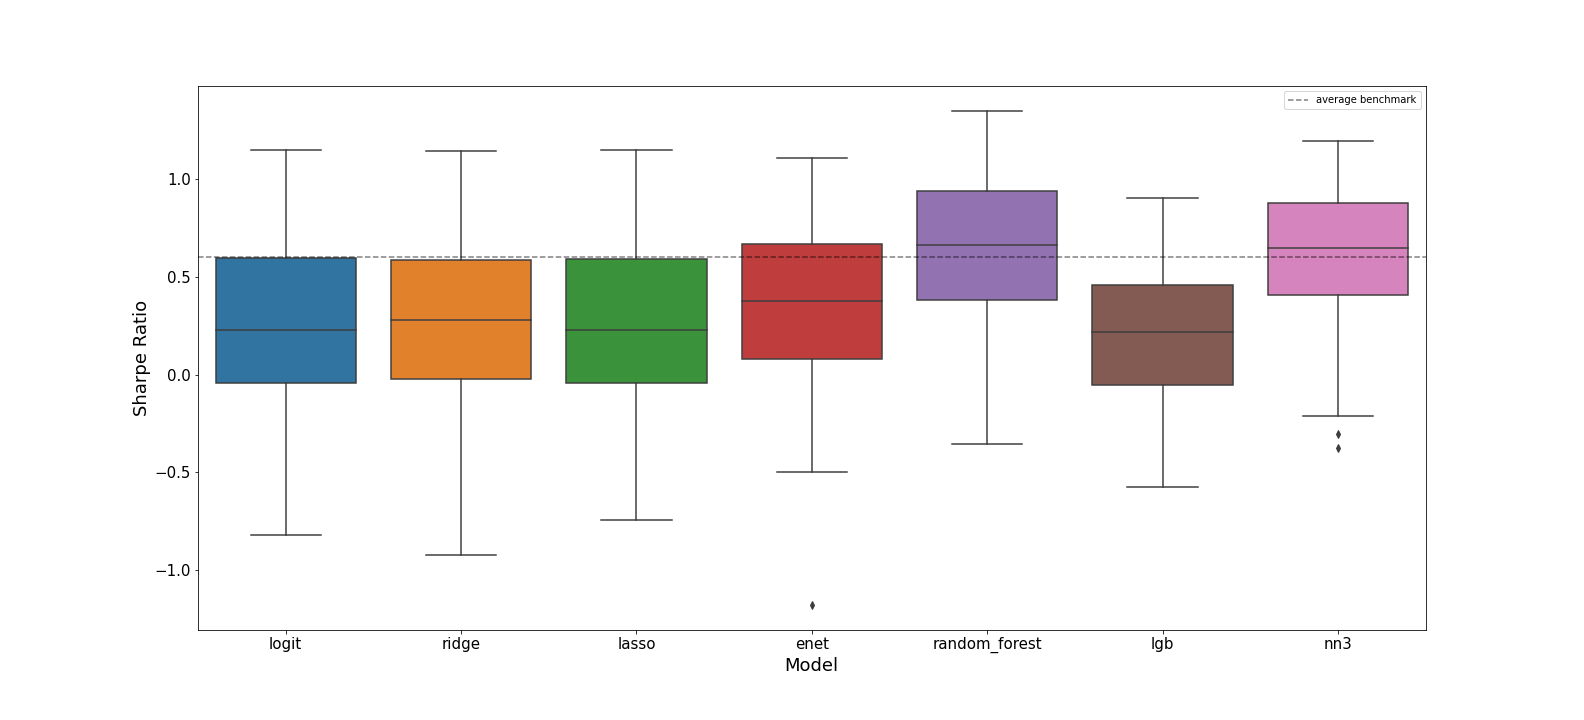

In [18]:
spx_sr_rank_df = sr_rank_df.reset_index()
spx_sr_rank_df = spx_sr_rank_df.loc[spx_sr_rank_df['ticker']=='SPX Index']
spx_sr_rank_df.set_index(['ticker', 'variable', 'model', 'fs'], inplace=True)
spx_sr_rank_df.sort_values('sharpe ratio', ascending=False)

sharpe ratio
ticker    variable   model         fs                   
SPX Index prediction random_forest huang        0.946450
                     enet          mda          0.867342
                     random_forest IAMB         0.850377
                     nn3           huang        0.771647
                                   IAMB         0.754835
                                   MMMB         0.753182
                     random_forest mdi          0.741438
                     logit         huang        0.727499
                     ridge         huang        0.727499
                     lasso         huang        0.724266
                     nn3           granger      0.703134
                     enet          mdi          0.686517
                     random_forest mda          0.678333
                                   MMMB         0.676010
                                   sfi          0.666191
                     lasso         mdi          0.644230
                     nn3           mdi          0.642749
                     enet          huang        0.640591
                     ridge         mda          0.637087
                     lgb           MMMB         0.621229
                     lasso         mda          0.620938
                                   MMMB         0.616234
                     logit         mda          0.589964
                     nn3           all          0.581438
                     random_forest all          0.571145
                     enet          MMMB         0.555453
                     ridge         MMMB         0.555453
                     logit         MMMB         0.555453
                     random_forest granger      0.448955
                     nn3           sfi          0.443636
                     lasso         granger      0.432918
          return     SPX Index     raw          0.424331
          prediction nn3           mda          0.385565
                     enet          granger      0.374284
                     lgb           huang        0.360428
                     enet          all          0.343691
                     lgb           IAMB         0.331725
                     enet          IAMB         0.277583
                     lasso         IAMB         0.245358
                     ridge         IAMB         0.245358
                     logit         IAMB         0.245358
                                   all          0.218036
                                   granger      0.210915
                     ridge         granger      0.206577
                     lgb           granger      0.147703
                     lasso         all          0.046881
                     ridge         mdi         -0.022865
                     enet          sfi         -0.036717
                     lasso         sfi         -0.040790
                     ridge         all         -0.083776
                     logit         mdi         -0.088334
                                   sfi         -0.162926
                     lgb           mdi         -0.196305
                                   mda         -0.306305
                     ridge         sfi         -0.323509
                     lgb           sfi         -0.348443
                                   all         -0.420538

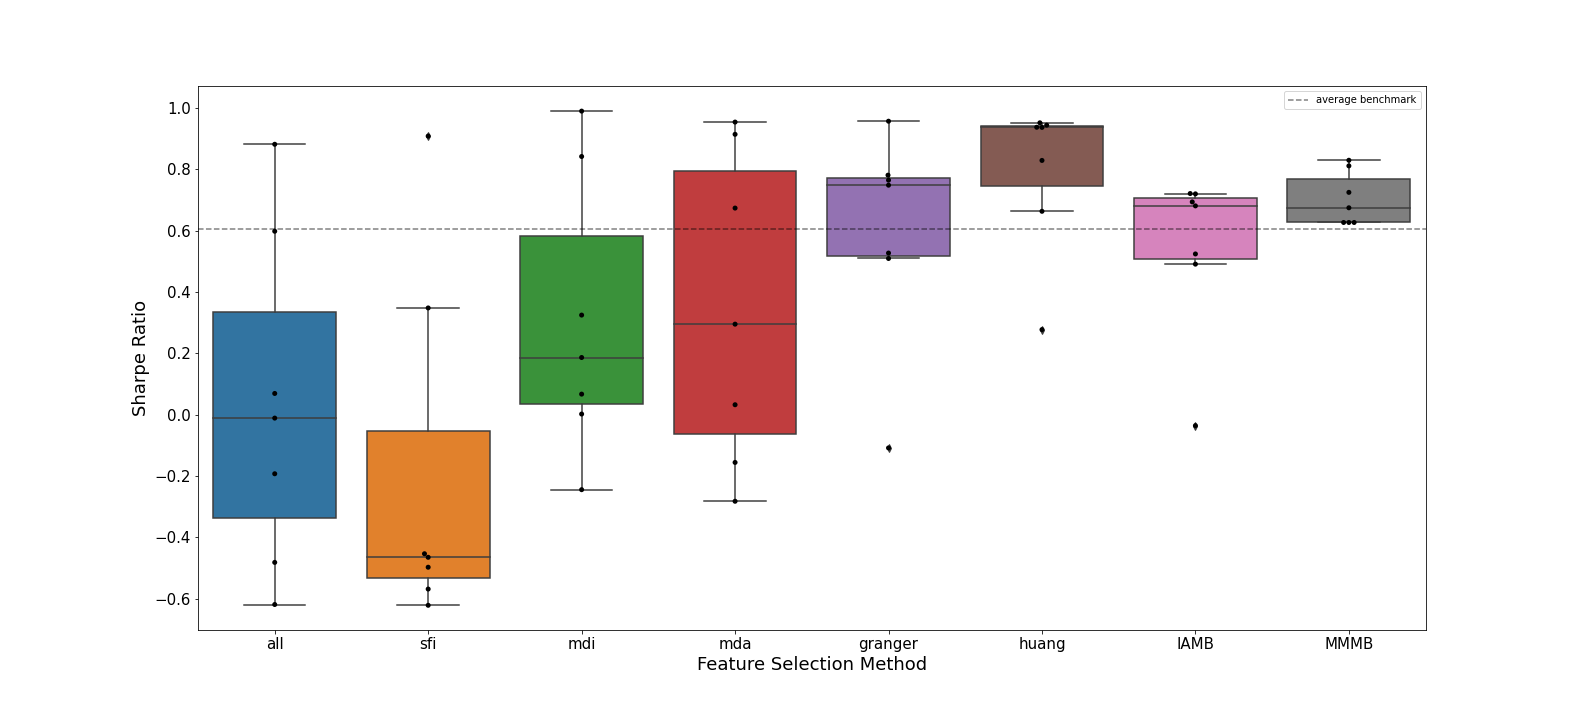

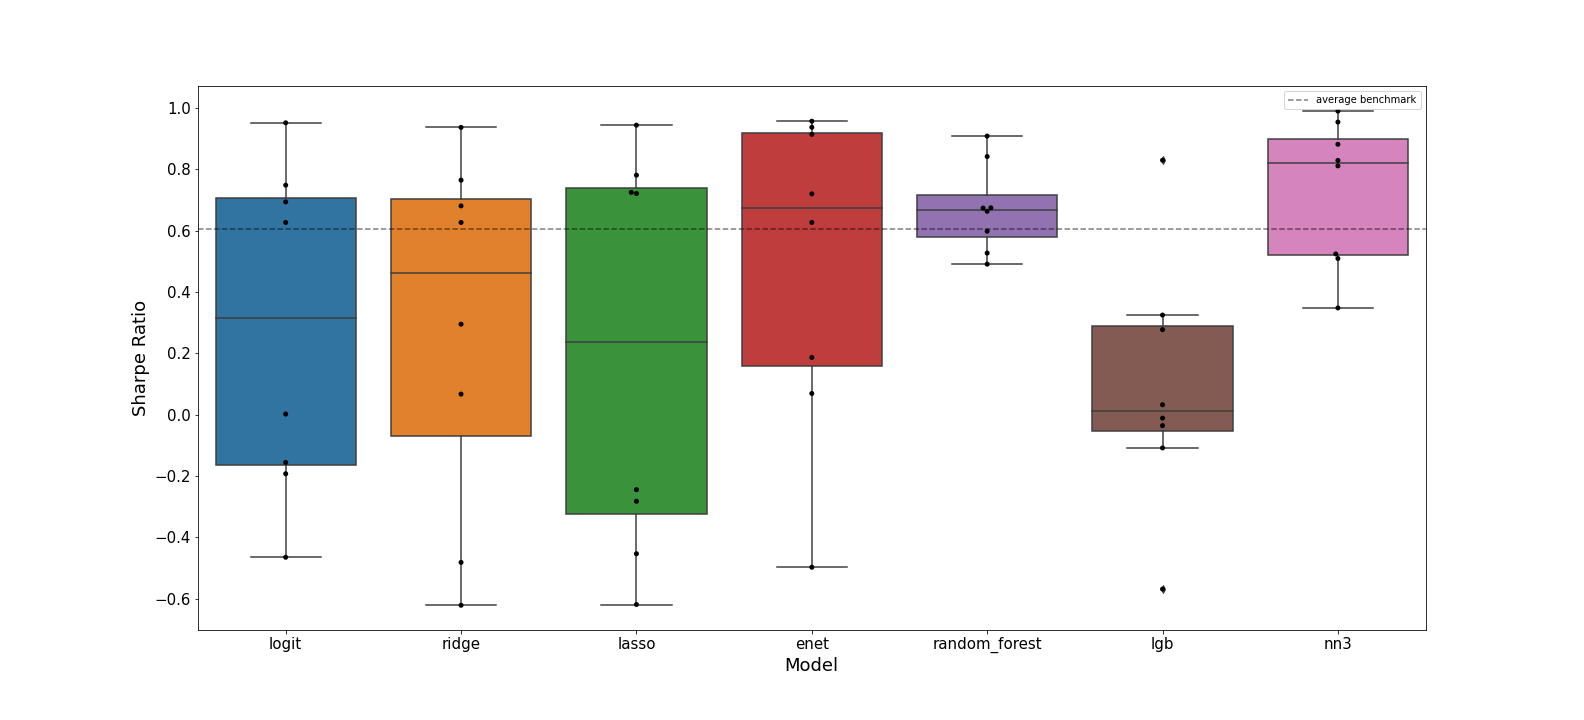

## Maximum drawdown

In [19]:
md_rank_df, md_tb_df, md_agg_df = max_drawdown_tb(pivot_ret_all_df=pivot_ret_all_df.dropna(),
                                                  level_to_subset='fs')

In [20]:
md_rank_df.reset_index().groupby(['fs'], as_index=False).median().sort_values('max drawdown', ascending=False)

fs  max drawdown
7      raw     -1.204663
5      mda     -1.295617
4    huang     -1.347540
6      mdi     -1.354469
1     MMMB     -1.358010
2      all     -1.358010
8      sfi     -1.358010
3  granger     -1.358512
0     IAMB     -1.460959

In [21]:
spx_md_rank_df = md_rank_df.reset_index()
spx_md_rank_df = spx_md_rank_df.loc[spx_md_rank_df['ticker']=='SPX Index']
spx_md_rank_df.set_index(['ticker', 'variable', 'model', 'fs'], inplace=True)
spx_md_rank_df.sort_values('max drawdown', ascending=False)

max drawdown
ticker    variable   model         fs                   
SPX Index prediction nn3           IAMB        -1.000021
                     ridge         granger     -1.000034
                     logit         granger     -1.000034
                     random_forest mdi         -1.000054
                                   sfi         -1.000056
                     enet          IAMB        -1.000079
                     lasso         IAMB        -1.000079
                     logit         IAMB        -1.000079
                     ridge         IAMB        -1.000079
                     nn3           MMMB        -1.000114
                     ridge         MMMB        -1.000114
          return     SPX Index     raw         -1.000114
          prediction enet          MMMB        -1.000114
                     logit         MMMB        -1.000114
                     nn3           mdi         -1.000114
                     random_forest all         -1.000114
                     nn3           huang       -1.000114
                                   all         -1.000114
                     lasso         MMMB        -1.000114
                     lgb           IAMB        -1.000144
                     nn3           mda         -1.000182
                     lgb           mda         -1.000207
                     random_forest IAMB        -1.000214
                                   mda         -1.000367
                     lgb           mdi         -1.000396
                                   all         -1.000906
                     ridge         mda         -1.001428
                     lasso         granger     -1.001547
                     logit         mda         -1.001938
                     random_forest huang       -1.002322
                                   MMMB        -1.002395
                     enet          granger     -1.003699
                     random_forest granger     -1.003720
                     lgb           MMMB        -1.004943
                     ridge         huang       -1.008900
                     enet          huang       -1.008900
                     lasso         huang       -1.008900
                     logit         huang       -1.008900
                     lgb           sfi         -1.010035
                     lasso         mda         -1.011649
                     nn3           sfi         -1.012118
                     ridge         sfi         -1.019751
                     logit         sfi         -1.028895
                     enet          sfi         -1.132767
                     ridge         all         -1.132767
                                   mdi         -1.177261
                     enet          mda         -1.209531
                     lasso         mdi         -1.225601
                                   sfi         -1.246677
                     enet          all         -1.394016
                     lgb           huang       -1.422252
                     enet          mdi         -1.486205
                     logit         mdi         -1.529945
                     lasso         all         -1.638986
                     logit         all         -1.946173
                     lgb           granger     -2.159472
                     nn3           granger     -4.772626

## Probability of Backtest Overfitting (PBO) Bailey et al. (2013)